### Generating Random Polytopes:

We will generate random points on the sphere $S^3$ and take their convex hull and then analyze their combinatorial structure:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
n = 3
p = 15

In [4]:
#given a simplical polytope - output it as a simplical complex.
def get_simplical_complex(polyhedron):
    faces = polyhedron.faces(polyhedron.dim() - 1) #getting the facets
    
    #now we iterate over each facet and transform to a list:
    facet_list = [[vert.index() for vert in face.vertices()] for face in faces]
    
    polyhedron_SC = SimplicialComplex(facet_list)
    return polyhedron_SC

In [5]:
def random_polytope(n = 3, p = 15):
    ring = RDF^n #this is just R^n with double precision
    vertices = [ring.random_element() for i in range(p)]
    plh = Polyhedron(vertices)
    return(plh)

In [6]:
def sphere_polytope(d = 3, p = 30):
    
    X = np.random.normal(size = (p,d)) #generate normal matrix
    norms = np.linalg.norm(X,axis = 1, keepdims=True)
    X = matrix(X/norms) #normalize rows
    plh = Polyhedron(list(X)) 
    return(plh)

In [16]:
sphere_polytope(d = 4)

A 4-dimensional polyhedron in RDF^4 defined as the convex hull of 30 vertices (use the .plot() method to plot)

In [17]:
plh = sphere_polytope(d = 4, p = 15)

In [18]:
plh.f_vector()

(1, 15, 69, 108, 54, 1)

In [19]:
plh.is_simplicial()

True

In [20]:
plh_sc = get_simplical_complex(plh)

In [22]:
plh_sc.alexander_dual()

Simplicial complex with 15 vertices and 53 facets

In [69]:
random_polytope()

A 3-dimensional polyhedron in RDF^3 defined as the convex hull of 12 vertices (use the .plot() method to plot)

Generate a bunch of random polytopes and see how many vertices they have:

In [83]:
f_0 = []
for i in range(5000):
    plh = random_polytope(p = 20)
    f_0.append(plh.n_vertices())

(array([    7.,    63.,   234.,   635.,  1076.,  1269.,   953.,   520.,
          194.,    49.]),
 array([  9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.]),
 <a list of 10 Patch objects>)

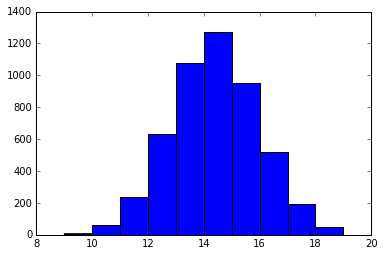

In [84]:
plt.hist(f_0)

In [100]:
np.std(f_0)

1.5762506907214981

In [99]:
np.mean(f_0)

13.887600000000001

Generate a bunch of sphere polytopes in $\mathbb R^4$:

In [252]:
plh = random_polytope(n = 4, p = 100)

In [253]:
plh

A 4-dimensional polyhedron in RDF^4 defined as the convex hull of 54 vertices (use the .plot() method to plot)

In [264]:
plh.plot()

Graphics3d Object

In [257]:
plh.f_vector()

(1, 54, 321, 534, 267, 1)

In [260]:
plh.is_simplicial()

True

In [258]:
plh_sc = get_simplical_complex(plh)

In [263]:
plh_sc.g_vector()

[1, 49, 115]

In [266]:
plh_sc.barycentric_subdivision().is_flag_complex()

True

In [269]:
plh_graph = plh.graph()

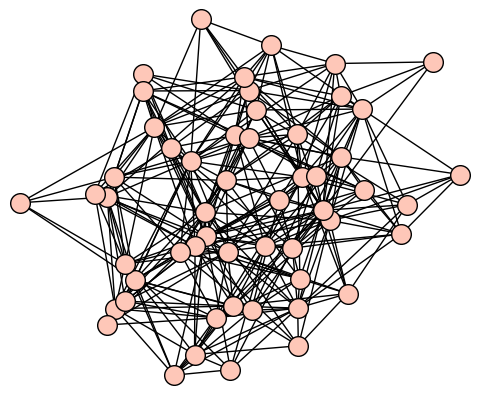

In [273]:
plh_graph.plot(vertex_labels=False)

### Distribution of f-vectors for simplical 4-polytopes:

For a simplicial polytope we have the following lower and upper bounds for the number of edges:
$$\binom{f_0}{2} \geq f_1 \geq d f_0 -   \binom{d+1}{2}$$

And in particular for a $4$-polytope it is $f_1 \geq 4 f_0 - 10$.

In [65]:
sphere_polytope(d = 4, p = 20).f_vector()[2]

99

In [101]:
plh.f_vector()

(1, 15, 66, 102, 51, 1)

In [89]:
get_simplical_complex(plh).is_flag_complex()

False

In [110]:
edges = []
flag = []
for i in range(1000):
    try:
        plh = sphere_polytope(d = 4, p = 15)
        
        if i %100 == 0:
            print(plh)
            
        edges.append(plh.f_vector()[2])
        
        
        plh_sc = get_simplical_complex(plh)
        is_flag = get_simplical_complex(plh).is_flag_complex()
        flag.append(is_flag)
        
    except:
        pass        

A 4-dimensional polyhedron in RDF^4 defined as the convex hull of 15 vertices
A 4-dimensional polyhedron in RDF^4 defined as the convex hull of 15 vertices
A 4-dimensional polyhedron in RDF^4 defined as the convex hull of 15 vertices
A 4-dimensional polyhedron in RDF^4 defined as the convex hull of 15 vertices
A 4-dimensional polyhedron in RDF^4 defined as the convex hull of 15 vertices
A 4-dimensional polyhedron in RDF^4 defined as the convex hull of 15 vertices
A 4-dimensional polyhedron in RDF^4 defined as the convex hull of 15 vertices
A 4-dimensional polyhedron in RDF^4 defined as the convex hull of 15 vertices
A 4-dimensional polyhedron in RDF^4 defined as the convex hull of 15 vertices
A 4-dimensional polyhedron in RDF^4 defined as the convex hull of 15 vertices
A 4-dimensional polyhedron in RDF^4 defined as the convex hull of 15 vertices
A 4-dimensional polyhedron in RDF^4 defined as the convex hull of 15 vertices
A 4-dimensional polyhedron in RDF^4 defined as the convex hull o

In [111]:
len(edges)

952

(array([   1.,    0.,    0.,    0.,    0.,    1.,    0.,    3.,    5.,
           0.,   34.,    0.,   52.,    0.,  135.,  154.,    0.,  183.,
           0.,  162.,    0.,  110.,   54.,    0.,   36.,    0.,   14.,
           0.,    6.,    2.]),
 array([ 57.        ,  57.56666667,  58.13333333,  58.7       ,
         59.26666667,  59.83333333,  60.4       ,  60.96666667,
         61.53333333,  62.1       ,  62.66666667,  63.23333333,
         63.8       ,  64.36666667,  64.93333333,  65.5       ,
         66.06666667,  66.63333333,  67.2       ,  67.76666667,
         68.33333333,  68.9       ,  69.46666667,  70.03333333,
         70.6       ,  71.16666667,  71.73333333,  72.3       ,
         72.86666667,  73.43333333,  74.        ]),
 <a list of 30 Patch objects>)

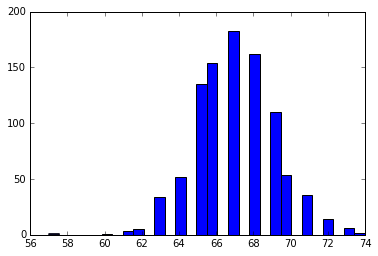

In [115]:
plt.hist(edges, bins = 30)

In [121]:
plh = sphere_polytope(d = 4, p = 20)
sc_plh = get_simplical_complex(plh)

In [132]:
plh.f_vector()

(1, 20, 97, 154, 77, 1)

In [124]:
sc_plh.g_vector()

[1, 15, 27]

In [125]:
sc_plh.is_flag_complex()

False

In [130]:
plh_cliques = sc_plh.graph().clique_complex()

In [131]:
plh_cliques.f_vector()

[1, 20, 97, 165, 100, 12]

In [133]:
cycle = SimplicialComplex([[1,2], [2, 3], [3, 1]])

In [142]:
stacked_poly = cycle.join(cycle)

In [149]:
stacked_poly.f_vector()

[1, 6, 15, 18, 9]